In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/Mall_Customers.csv')

In [ ]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

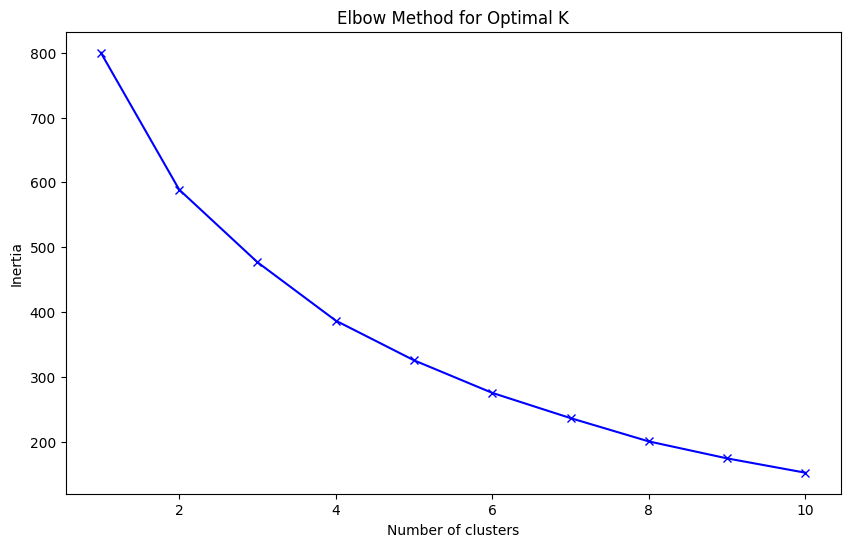

In [ ]:
# Determine the optimal number of clusters using the Elbow method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()



In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(data_scaled)
data['Cluster'] = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


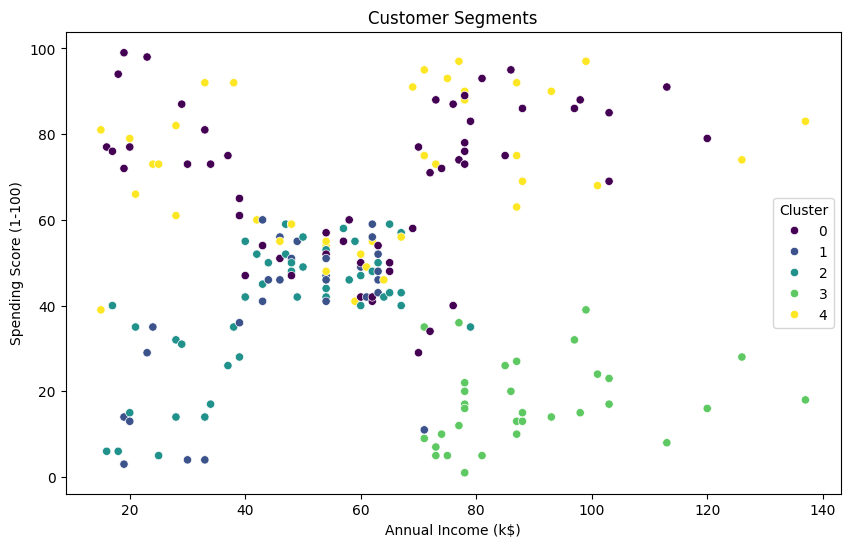

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis')
plt.title('Customer Segments')
plt.show()

In [ ]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers = pd.DataFrame(centers, columns=['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
print(cluster_centers)

     Gender        Age  Annual Income (k$)  Spending Score (1-100)
0  1.000000  28.345455           60.800000               68.654545
1  0.000000  57.214286           46.785714               38.714286
2  1.000000  48.720930           46.186047               39.674419
3  0.424242  40.727273           89.030303               16.939394
4  0.000000  28.536585           61.804878               71.097561
